In this notebook:

* converting images between different color models
* the Fourier transform
* high-pass filters HPFs, low-pass filter (LPFs), edge detection filters, custom conv filters
* detecting shapes


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# !pip install scipy
# !pip install matplotlib

## Converting images between different color models

Light is not paint. We use additive models in computers, paintings use subtractive color model

For example:   
[0 , 255, 255] additive - YELLOW or BROWN in subtractive ( green + red )


In [3]:
# BGR represented by a triptlet of 8-bit values [0, 0, 0] - black [255, 0, 0] - blue etc..
# HSV uses different triplet of channels: 
# Hue - color tone. 
# saturation - intensity 
# and value - brightness

## Exploring the Fourier transform

All the waveforms are just the sum of simple sinusoids of different frequencies.  
In the other words, the waveforms are the sum of other waveforms

Преобразование Фурье позволяет разложить исходный сигнал на гармонические составляющие, что потребуется для выделения шумов

### HPFs and LPFs

HPF is a filter that examines a region of an image and boost the intensity of certaing pixels based on the difference in the intensity of the surrrounding pixels

HPF - это фильтр, который исследует область изображения и увеличивает интенсивность определенных пикселей на основе разницы в интенсивности окружающих пикселей

In [4]:
# High-boost filter (uses in edge detection)
HB = [[0, -0.25, 0],
     [-0.25, 1, -0.25],
     [0, -0.25, 0]]

This kernel gives the average difference in intensity between the central pixel and all its immediate horizontal neighbors. If the pixel stands out from the surrounding pixels, the resulting value will be high.

Это ядро дает среднюю разницу в интенсивности между центральным пикселем и всеми его непосредственными соседями по горизонтали. Если пиксель выделяется на фоне окружающих пикселей, результирующее значение будет высоким.

A high-pass filter is an equalization tool that removes all frequencies below a set point. In other words, a high pass filter leaves high frequencies untouched while mitigating low frequencies. 

Note: in edge detection kernel values sum = 0

In [5]:
HB

[[0, -0.25, 0], [-0.25, 1, -0.25], [0, -0.25, 0]]

In [6]:
import numpy as np

kernels_dict = {}
def create_kernel_to_dict(dimensions):
    data = []
    for _ in range(dimensions):
        row = input("Введите строку: ")
        values = row.split(',')
        data.append([float(val.strip()) for val in values])

    array = np.array(data)

    variable_name = input("Введите имя ключа для сохранения массива: ")

    #Cохраняем массив в выбранную переменную
    kernels_dict[variable_name] = array

    print(f"Массив сохранен в словарь с ключем: '{variable_name}'.")

    return array, variables_dict


In [7]:
# create_kernel_to_dict(3)

In [8]:
# create_kernel_to_dict(5)

In [9]:
import cv2
import numpy as np
from scipy import ndimage

kernel_3x3 = [[-1., -1., -1.],
        [-1.,  8., -1.],
        [-1., -1., -1.]]

kernel_5x5 = [[-1., -1., -1., -1., -1.],
        [-1.,  1.,  2.,  1., -1.],
        [-1.,  2.,  4.,  2., -1.],
        [-1.,  1.,  2.,  1., -1.],
        [-1., -1., -1., -1., -1.]]

kernel_7x7 = np.array([   
    [-1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1],
    [-1, -1, 25, 25, 25, -1, -1],
    [-1, -1, 25, 25, 25, -1, -1],
    [-1, -1, 25, 25, 25, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1]])

# kernel_3x3 = kernels_dict['kernel3']
# kernel_5x5 = kernels_dict['kernel5']

# 1 COLOR, 0 GRAYSC, -1 with alpha
img = cv2.imread(r"C:\Users\johnw\Pictures\photo_2022-12-05_12-06-27.jpg",0)

k3 = ndimage.convolve(img, kernel_3x3)
k5 = ndimage.convolve(img, kernel_5x5)
k7 = ndimage.convolve(img,kernel_7x7)
g_HB = ndimage.convolve(img, HB)
laplacian = cv2.Laplacian(img, cv2.CV_64F)

blurred = cv2.GaussianBlur(img, (17,17),0)

#Best result. Differential HPF 
g_hpf = img - blurred 

# cv2.namedWindow('img', cv2.WINDOW_NORMAL)
# cv2.imshow('img',img)
# cv2.namedWindow('g_hpf', cv2.WINDOW_NORMAL)
# cv2.namedWindow('laplacian', cv2.WINDOW_NORMAL)

cv2.imshow('3x3',k3)
cv2.imshow('5x5',k5)
cv2.imshow('7x7',k7)
# cv2.imshow('blurred',blurred)
# cv2.imshow('high_boost',g_HB)
# cv2.imshow('g_hpf',g_hpf)
# cv2.imshow('laplacian',laplacian)

cv2.waitKey(0)
cv2.destroyAllWindows()


* Для каждого пикселя изображения, ядро перемещается так, чтобы центр ядра совпадал с текущим пикселем

* Значения ядра умножаются на соответствующие значения пикселей изображения.

* Результаты умножения суммируются, и это становится новым значением для текущего пикселя.

PS Для краевых значений используется паддинг или мод отображения смотри doc ndimage. 
По умолчанию == reflect ,если 1 2 3 4 | 4 3 2 1 .   
Mirror : 1 2 3 4 |3 2 1
Nearest 1 2 3 4 | 4 4 4   
Constant 1 2 3 4 | 0 0 0

(-0.5, 499.5, 449.5, -0.5)

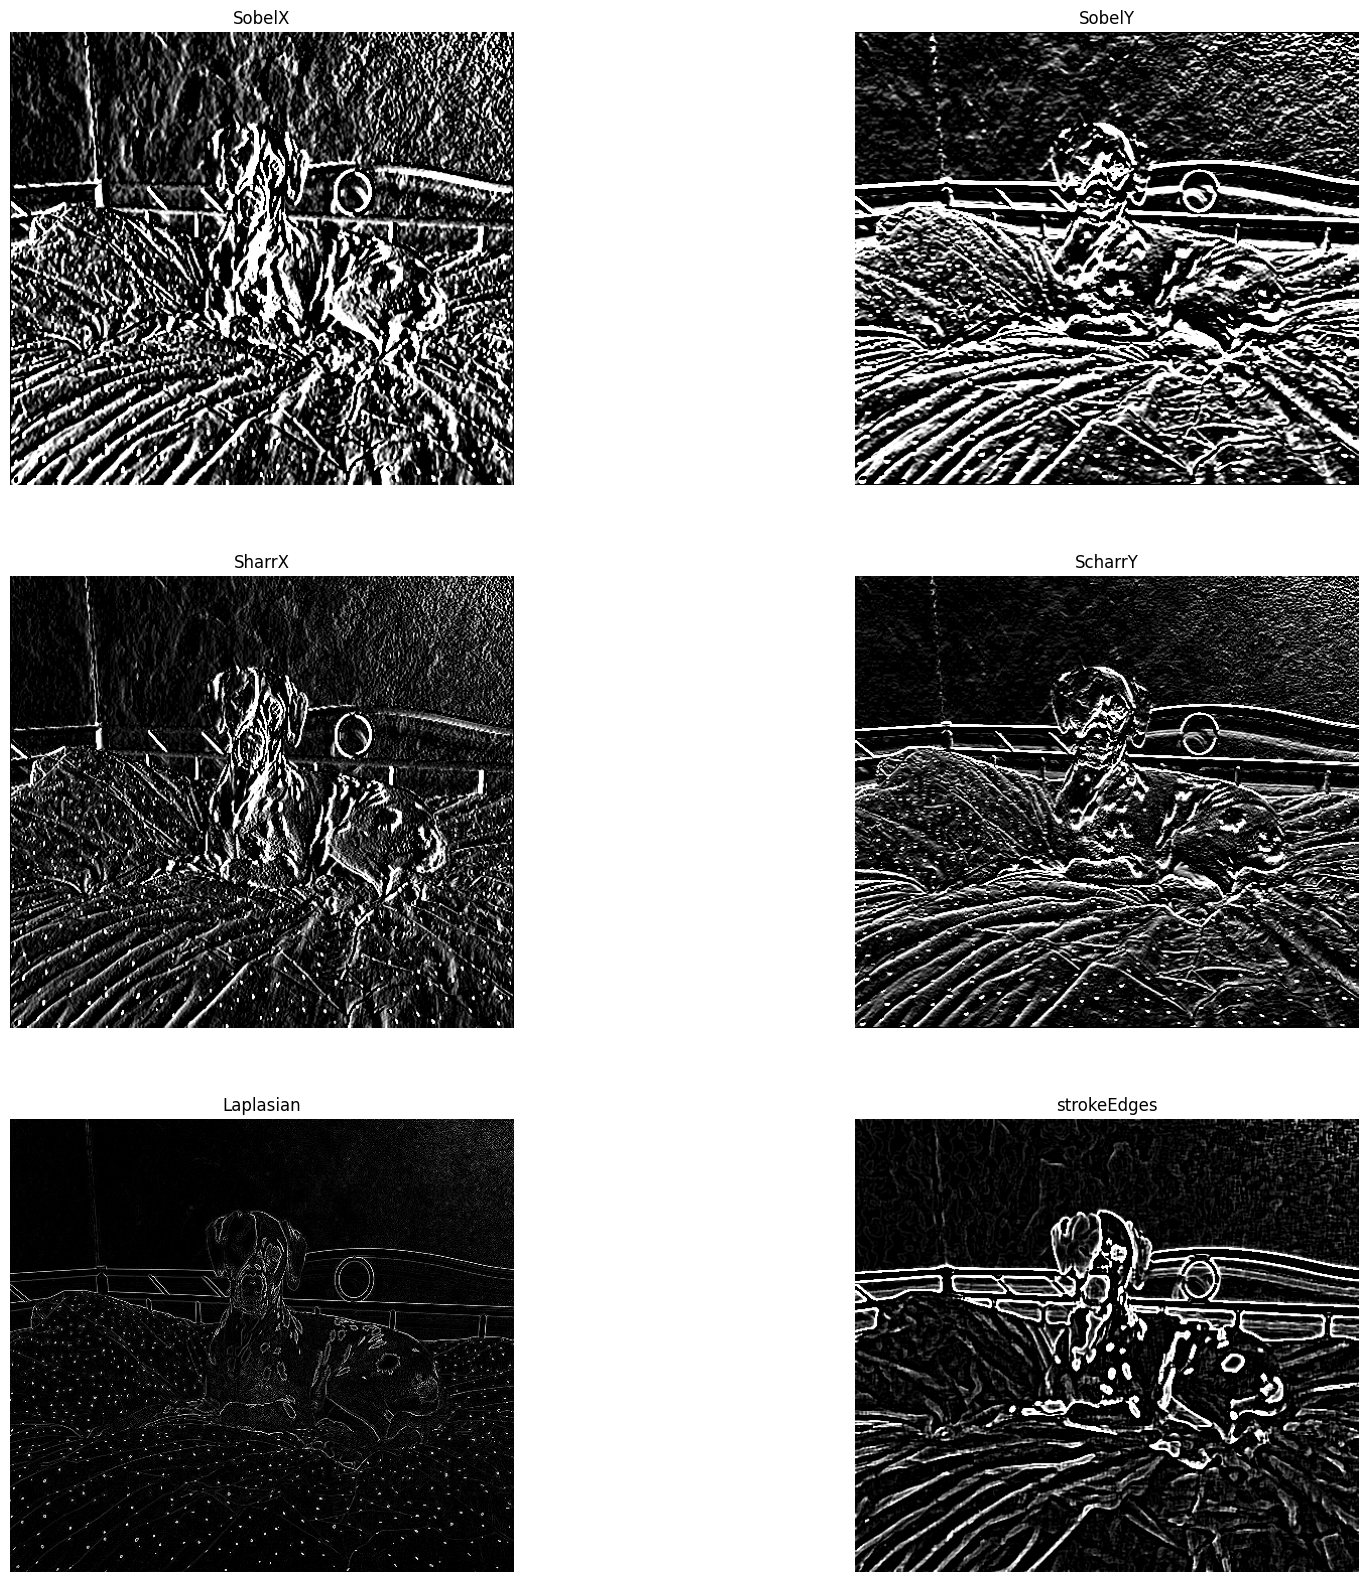

In [10]:
import matplotlib.pyplot as plt

img = cv2.imread(r"C:\Users\johnw\Pictures\photo_2022-12-05_12-06-27.jpg",0)

img = cv2.resize(img, (500, 450), interpolation=cv2.INTER_CUBIC)

k5 = cv2.resize(k5, (500, 450), interpolation=cv2.INTER_CUBIC)
k3 = cv2.resize(k3, (500, 450), interpolation=cv2.INTER_CUBIC)
k7 = cv2.resize(k7, (500, 450), interpolation=cv2.INTER_CUBIC)

sobelx = cv2.Sobel(img, cv2.CV_8U, 1, 0, ksize=5) 
sobely = cv2.Sobel(img, cv2.CV_8U, 0, 1, ksize=5)
laplacian = cv2.Laplacian(img, cv2.CV_8U)
scharrx = cv2.Scharr(img, cv2.CV_8U, 1, 0) 
scharry = cv2.Scharr(img, cv2.CV_8U, 0, 1)


blurred_median = cv2.medianBlur(img,7)
strokeEdges = cv2.Laplacian(blurred_median,cv2.CV_8U,blurred_median, ksize=5)


# plot images
plt.subplots(3,2,figsize=(20,20))

plt.subplot(3, 2, 1)
plt.imshow(sobelx, cmap='gray')
plt.title('SobelX')
plt.axis('off') 

plt.subplot(3, 2, 2)
plt.imshow(sobely, cmap='gray')
plt.title('SobelY')
plt.axis('off') 

  
plt.subplot(3, 2, 3)
plt.imshow(scharrx, cmap='gray')
plt.title('SharrX')
plt.axis('off') 

plt.subplot(3, 2, 4)
plt.imshow(scharry, cmap='gray')
plt.title('ScharrY')
plt.axis('off') 

plt.subplot(3, 2, 5)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplasian')
plt.axis('off') 

plt.subplot(3, 2, 6)
plt.imshow(strokeEdges, cmap='gray')
plt.title('strokeEdges')
plt.axis('off') 

# cv2.imshow('sobelx',sobelx)
# cv2.imshow('sobely',sobely)
# cv2.imshow('laplacian',laplacian)
# cv2.imshow('hpf',g_hpf)
  

# cv2.waitKey(0)
# cv2.destroyAllWindows()

Лапласиан – это оператор, который применяется к изображению для обнаружения скачков яркости или границ. В обработке изображений Лапласиан может быть выражен как сумма вторых производных по x и y:

Лапласиан = ∂²f/∂x² + ∂²f/∂y²

где f - это функция интенсивности изображения.


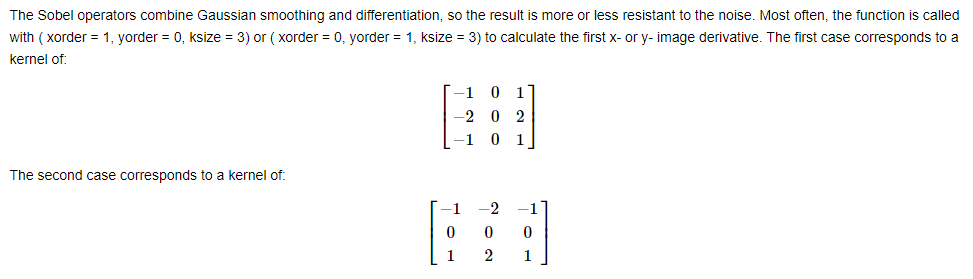


This filters turns non-edge regions into black and edge into white or saturated colors. However, they are prone to misidentify noise as edges. This can be mitigated by blurring an image before trying to find edges(blur,median,gausian).Right image in the bottom called 'strokeEdges' shows laplasian after median blur.

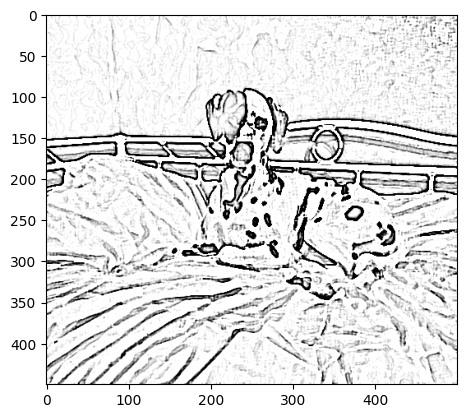

In [11]:
#Invers

normalizedInverseAlpha = ( 1.0 / 255 ) * (255 - strokeEdges)

plt.imshow(normalizedInverseAlpha, cmap = 'gray')

Should remember that cv2 works with BGR format , matplotlib expects RGB to show

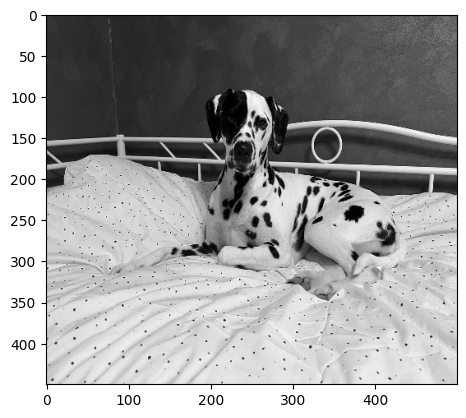

In [12]:
#Original image in Matplotlib .

image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image)

### Filter 2d

For color images filter2D() applies kernel qequally to each channel. To use different kernels on different channels use the split() and merge() functions 

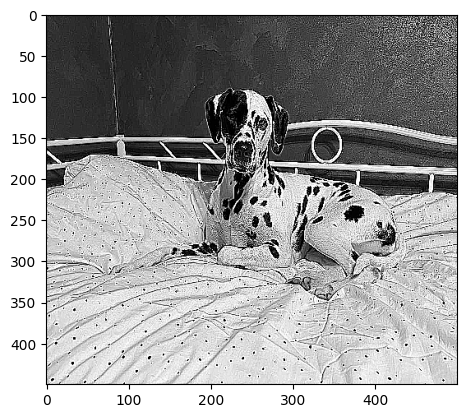

In [13]:
# Sharpening

img_copy = img.copy()

kernel = np.array([
    [-1,-1,-1],
    [-1,9,-1],
    [-1,-1,-1]
])

# Note that wheights of sharpen kernel sum == 1 , when edge detection kernel has 0 instead.

pic = cv2.filter2D(img_copy,-1,kernel,img_copy)
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
plt.imshow(pic)

The emboss filter, also called a directional difference filter, will enhance edges in the direction of the selected convolution mask(s)

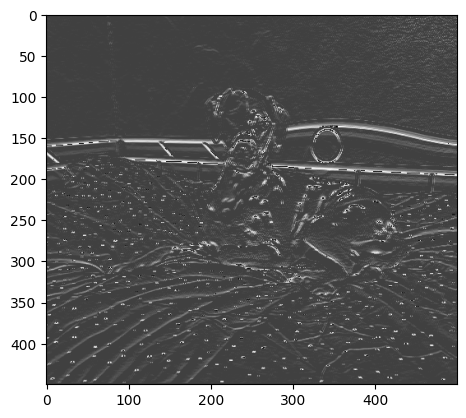

In [15]:
#EmbossFilter
#Positive weights blurs and negative weights -sharpen


img_copy = img.copy()

kernel_emboss_l = np.array([
            [1, 0, 1],
            [0, 0, 0],
            [-1, 0, -1]
        ])

pic_el = cv2.filter2D(img_copy,-1,kernel_emboss_l,img_copy)
pic_el = cv2.cvtColor(pic_el, cv2.COLOR_BGR2RGB)

# Для ограничения значений пикселей в диапазоне от 0 до 255 после добавления значения яркости.

brightness_value = 64
pic_el = np.clip(pic_el + brightness_value, 0, 255).astype(np.uint8)

plt.imshow(pic_el)

In [ ]:
#EmbossFilter
#Positive weights blurs and negative weights -sharpen

img_copy = img.copy()

kernel_emboss_r = np.array([
            [2, 1, 0],
            [1, 1, -1],
            [0, -1, -2]
        ])

pic_er = cv2.filter2D(img_copy,-1,kernel_emboss_r,img_copy)
pic_er = cv2.cvtColor(pic_er, cv2.COLOR_BGR2RGB)
plt.imshow(pic_er)